# naive classifier 

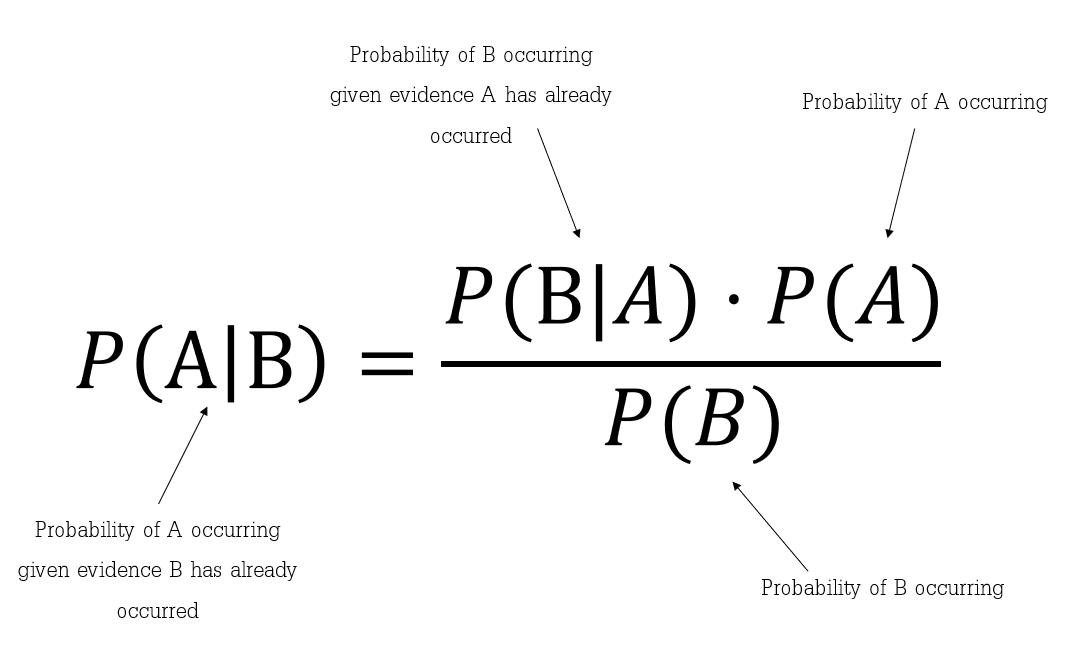

In [10]:
import warnings 
warnings.filterwarnings("ignore")

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

# iris data

In [12]:
iris = sns.load_dataset("iris")

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='species', ylabel='petal_length'>

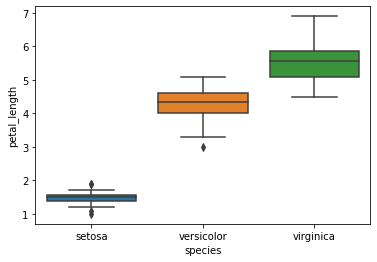

In [14]:
sns.boxplot(iris.species,iris.petal_length)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

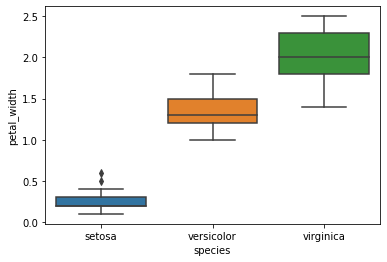

In [15]:
sns.boxplot(iris.species,iris.petal_width)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

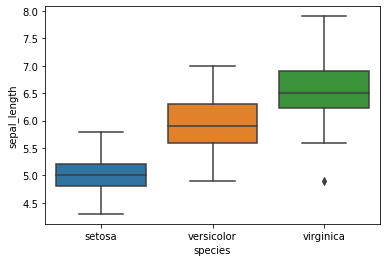

In [16]:
sns.boxplot(iris.species,iris.sepal_length)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

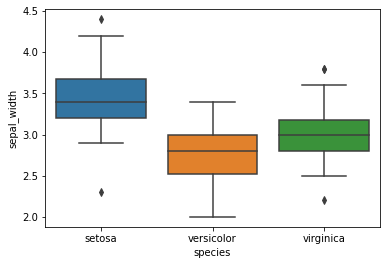

In [17]:
sns.boxplot(iris.species,iris.sepal_width) 

In [11]:
??sns.distplot

<AxesSubplot:xlabel='petal_width'>

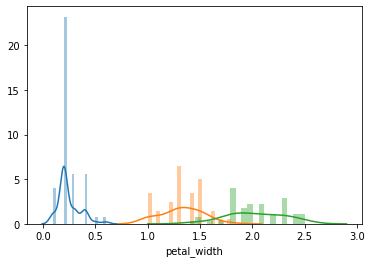

In [30]:
sns.distplot(iris[iris.species=="setosa"].iloc[:,3],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="versicolor"].iloc[:,3],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="virginica"].iloc[:,3],norm_hist=True,bins=20)

<AxesSubplot:xlabel='petal_length'>

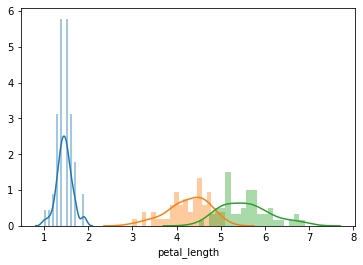

In [31]:
sns.distplot(iris[iris.species=="setosa"].iloc[:,2],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="versicolor"].iloc[:,2],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="virginica"].iloc[:,2],norm_hist=True,bins=20)

<AxesSubplot:xlabel='sepal_width'>

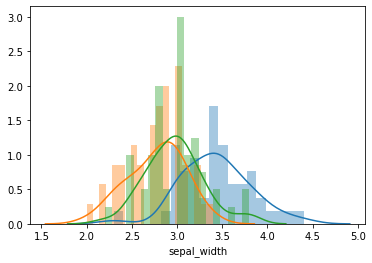

In [32]:
sns.distplot(iris[iris.species=="setosa"].iloc[:,1],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="versicolor"].iloc[:,1],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="virginica"].iloc[:,1],norm_hist=True,bins=20)

<AxesSubplot:xlabel='sepal_length'>

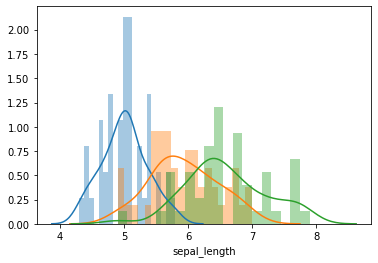

In [33]:
sns.distplot(iris[iris.species=="setosa"].iloc[:,0],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="versicolor"].iloc[:,0],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="virginica"].iloc[:,0],norm_hist=True,bins=20)

In [7]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,1:2],iris.iloc[:,4] ,test_size=0.3, shuffle=True)




In [25]:
model=GaussianNB()
model=model.fit(X_train,y_train)

In [26]:
y_test_pred=model.predict(X_test)

In [27]:
metrics.accuracy_score(y_test,y_test_pred)

0.4444444444444444

In [38]:
x_train,x_test,y_train,y_test=train_test_split(iris.iloc[:,0:4],iris.iloc[:,4],test_size=0.3,shuffle=True)

mu1=np.mean(x_train[y_train=="setosa"].petal_length)
sigma1=np.var(x_train[y_train=="setosa"].petal_length)

mu2=np.mean(x_train[y_train=="versicolor"].petal_length)
sigma2=np.var(x_train[y_train=="versicolor"].petal_length)

mu3=np.mean(x_train[y_train=="virginica"].petal_length)
sigma3=np.var(x_train[y_train=="virginica"].petal_length)

def dis(mu,x,sigma):
    return (np.exp(-(x-mu)**2)/(2*sigma))/(np.sqrt(sigma))
    
x_test["prob_class_1"]=x_test["petal_length"].apply(lambda x: dis(mu1,x,sigma1))
x_test["prob_class_2"]=x_test["petal_length"].apply(lambda x: dis(mu2,x,sigma2))
x_test["prob_class_3"]=x_test["petal_length"].apply(lambda x: dis(mu3,x,sigma3))
l=["setosa","versicolor","virginica"]
x_test["pred"]=np.argmax(x_test[["prob_class_1","prob_class_2","prob_class_3"]].values,axis=1)
x_test["pred"]=x_test["pred"].apply(lambda x: l[x])
x_test["true"]=y_test
# x_test.drop("col1",axis=1,inplace=True)
# x_test.drop("col2",axis=1,inplace=True)
# x_test.drop("col3",axis=1,inplace=True)

In [39]:
x_test

,sepal_length,sepal_width,petal_length,petal_width,prob_class_1,prob_class_2,prob_class_3,pred,true
72,6.3,2.5,4.9,1.5,5.824603e-04,3.021274,2.659396e+00,versicolor,versicolor
33,5.5,4.2,1.4,0.2,7.126863e+01,0.001771,1.359070e-07,setosa,setosa
149,5.9,3.0,5.1,1.8,1.422874e-04,2.205473,3.311803e+00,virginica,virginica
38,4.4,3.0,1.3,0.2,6.948856e+01,0.000999,5.869026e-08,setosa,setosa
79,5.7,2.6,3.5,1.0,1.194387e+00,2.911990,6.095260e-02,versicolor,versicolor
53,5.5,2.3,4.0,1.3,1.229599e-01,4.627397,3.681835e-01,versicolor,versicolor
49,5.0,3.3,1.4,0.2,7.126863e+01,0.001771,1.359070e-07,setosa,setosa
45,4.8,3.0,1.4,0.3,7.126863e+01,0.001771,1.359070e-07,setosa,setosa
51,6.4,3.2,4.5,1.5,7.677771e-03,4.460016,1.348929e+00,versicolor,versicolor
113,5.7,2.5,5.0,2.0,2.907766e-04,2.607287,2.997552e+00,virginica,virginica


# diabetes.csv




In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


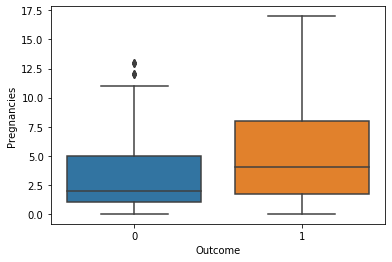

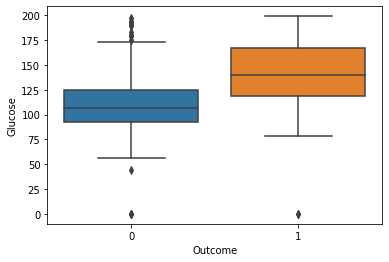

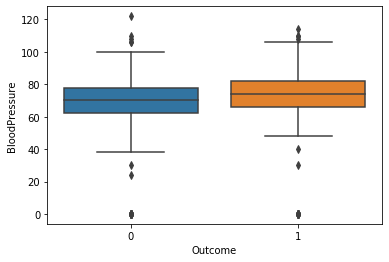

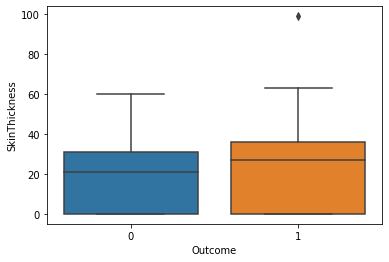

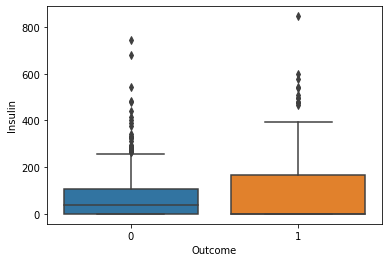

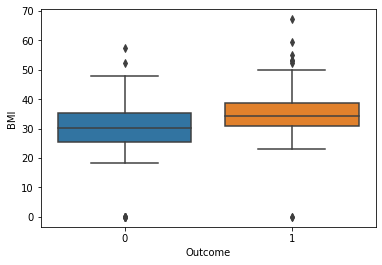

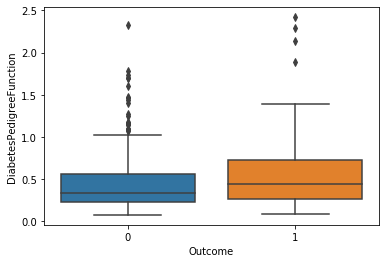

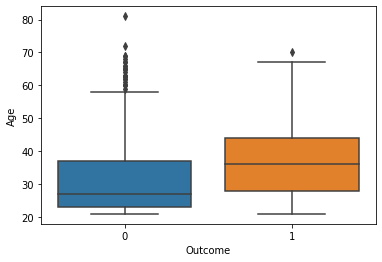

In [4]:
for i in data.columns[:-1]:
    sns.boxplot(data['Outcome'],data[i])
    plt.show()

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data_x=data[[col for col in data.columns if col!="Outcome"]]
data_y=data["Outcome"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,test_size=0.3, shuffle=True) 



In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1],test_size=0.3, shuffle=True) 



In [9]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
model=GaussianNB()
model=model.fit(X_train,y_train)

In [10]:
y_test_pred=model.predict(X_test)

In [11]:
metrics.accuracy_score(y_test,y_test_pred)

0.7619047619047619

# one feature at a time 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1],test_size=0.3, shuffle=True) 


for i in data.columns[:-1]:
    model=GaussianNB()
    model=model.fit(X_train[[i]],y_train)
    y_test_pred=model.predict(X_test[[i]])    
    print("accuracy for feature" ,i,metrics.accuracy_score(y_test,y_test_pred))
    
    

accuracy for feature Pregnancies 0.6796536796536796
accuracy for feature Glucose 0.8138528138528138
accuracy for feature BloodPressure 0.658008658008658
accuracy for feature SkinThickness 0.658008658008658
accuracy for feature Insulin 0.658008658008658
accuracy for feature BMI 0.6883116883116883
accuracy for feature DiabetesPedigreeFunction 0.6883116883116883
accuracy for feature Age 0.6666666666666666


# two feature at a time

In [13]:
import itertools

In [14]:
for i in itertools.combinations(data.columns[:-1],2):
    model=GaussianNB()
    model=model.fit(X_train[list(i)],y_train)
    y_test_pred=model.predict(X_test[list(i)])    
    print("accuracy " ,i,metrics.accuracy_score(y_test,y_test_pred))
    
    
    

accuracy  ('Pregnancies', 'Glucose') 0.7792207792207793
accuracy  ('Pregnancies', 'BloodPressure') 0.6493506493506493
accuracy  ('Pregnancies', 'SkinThickness') 0.6796536796536796
accuracy  ('Pregnancies', 'Insulin') 0.658008658008658
accuracy  ('Pregnancies', 'BMI') 0.7186147186147186
accuracy  ('Pregnancies', 'DiabetesPedigreeFunction') 0.6883116883116883
accuracy  ('Pregnancies', 'Age') 0.6753246753246753
accuracy  ('Glucose', 'BloodPressure') 0.8138528138528138
accuracy  ('Glucose', 'SkinThickness') 0.8138528138528138
accuracy  ('Glucose', 'Insulin') 0.7662337662337663
accuracy  ('Glucose', 'BMI') 0.8181818181818182
accuracy  ('Glucose', 'DiabetesPedigreeFunction') 0.7965367965367965
accuracy  ('Glucose', 'Age') 0.7965367965367965
accuracy  ('BloodPressure', 'SkinThickness') 0.6536796536796536
accuracy  ('BloodPressure', 'Insulin') 0.6666666666666666
accuracy  ('BloodPressure', 'BMI') 0.70995670995671
accuracy  ('BloodPressure', 'DiabetesPedigreeFunction') 0.6883116883116883
accura

# fun-data-csv 

In [163]:
data=pd.read_csv("fun-data.csv")


In [164]:
data.head()

,f1,f2,f3,class
0,8.477937,0.436289,40.389470,1
1,6.704407,6.237227,65.349761,1
2,4.835130,4.500931,52.093300,1
3,5.179056,9.523951,79.049424,1
4,5.030426,4.569668,51.970028,1


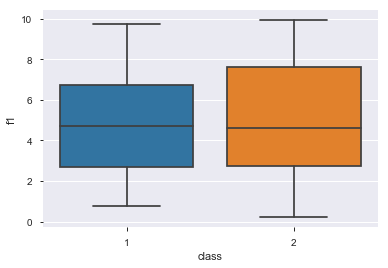

In [165]:
sns.boxplot(data["class"],data["f1"])

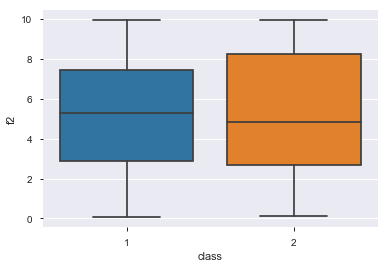

In [166]:
sns.boxplot(data["class"],data["f2"])

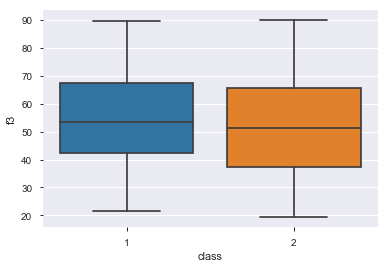

In [167]:
sns.boxplot(data["class"],data["f3"])

In [168]:
data_x=data[[col for col in data.columns if col!="class"]]
data_y=data["class"]

In [169]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,test_size=0.2, shuffle=True) 

In [170]:
model=BernoulliNB()
model=model.fit(X_train,y_train)

In [171]:
y_test_pred=model.predict(X_test)

In [172]:
metrics.accuracy_score(y_test,y_test_pred)

0.45

In [ ]:
for i in rsange(2o :)

  if 

# rough 


In [71]:


!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable execute_time/ExecuteTime
!jupyter nbextension enable collapsible_headings/main
!jupyter nbextension enable freeze/main
!jupyter nbextension enable scratchpad/main
!jupyter nbextension enable highlighter/highligh

     |████████████████████████████████| 20.9MB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 870kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 481kB 383kB/s eta 0:00:01


  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963395 sha256=e08a831d81aa931301c668d777220160f328012de36999c86c990e19a2a2a7cb
  Stored in directory: /Users/somnathmondal/Library/Caches/pip/wheels/0d/71/2a/164491997299b9f2479a251e254323fe35d946779e18f27956
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465823 sha256=143e155edf0429e1612ceda942dba29cefe49ad362eb7d3fa4ce46555ba351f5
  Stored in directory: /Users/somnathmondal/Library/Caches/pip/wheels/15/df/fe/2a74fe34709e7fdc5ae153a768675d9fda93cc7d5133ed1fb0
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator
[I 08:31:39 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 08:31:39 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 08:31:39 InstallContribNbextensionsApp] Installing /Users/anacon

[I 08:31:39 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/runtools/annotations.odg -> /Users/somnathmondal/Library/Jupyter/nbextensions/runtools/annotations.odg
[I 08:31:39 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/runtools/runtools.yaml -> /Users/somnathmondal/Library/Jupyter/nbextensions/runtools/runtools.yaml
[I 08:31:39 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/runtools/main.css -> /Users/somnathmondal/Library/Jupyter/nbextensions/runtools/main.css
[I 08:31:39 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/runtools/runtools_nb.png -> /Users/somnathmondal/Library/Jupyter/nbextensions/runtools/runtools_nb.png
[I 08:31:39 InstallContribNbextensionsApp] Copying

[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/splitcell/splitcell.js -> /Users/somnathmondal/Library/Jupyter/nbextensions/splitcell/splitcell.js
[I 08:31:40 InstallContribNbextensionsApp] - Validating: OK
[I 08:31:40 InstallContribNbextensionsApp] Installing /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/autosavetime -> autosavetime
[I 08:31:40 InstallContribNbextensionsApp] Making directory: /Users/somnathmondal/Library/Jupyter/nbextensions/autosavetime/
[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/autosavetime/icon.png -> /Users/somnathmondal/Library/Jupyter/nbextensions/autosavetime/icon.png
[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/autosavetime/README.md -> /Users

[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/nbTranslate/languages.js -> /Users/somnathmondal/Library/Jupyter/nbextensions/nbTranslate/languages.js
[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/nbTranslate/mutils.js -> /Users/somnathmondal/Library/Jupyter/nbextensions/nbTranslate/mutils.js
[I 08:31:40 InstallContribNbextensionsApp] - Validating: OK
[I 08:31:40 InstallContribNbextensionsApp] Installing /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/equation-numbering -> equation-numbering
[I 08:31:40 InstallContribNbextensionsApp] Making directory: /Users/somnathmondal/Library/Jupyter/nbextensions/equation-numbering/
[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/equation-n

[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/keyboard_shortcut_editor/icon.png -> /Users/somnathmondal/Library/Jupyter/nbextensions/keyboard_shortcut_editor/icon.png
[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/keyboard_shortcut_editor/readme_comma.png -> /Users/somnathmondal/Library/Jupyter/nbextensions/keyboard_shortcut_editor/readme_comma.png
[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/keyboard_shortcut_editor/readme_shortcut_editor_blank.png -> /Users/somnathmondal/Library/Jupyter/nbextensions/keyboard_shortcut_editor/readme_shortcut_editor_blank.png
[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/keyboard_shortcut

[I 08:31:40 InstallContribNbextensionsApp] Up to date: /Users/somnathmondal/Library/Jupyter/nbextensions/codefolding/readme.md
[I 08:31:40 InstallContribNbextensionsApp] Up to date: /Users/somnathmondal/Library/Jupyter/nbextensions/codefolding/main.js
[I 08:31:40 InstallContribNbextensionsApp] Up to date: /Users/somnathmondal/Library/Jupyter/nbextensions/codefolding/magic-unfolded.png
[I 08:31:40 InstallContribNbextensionsApp] Up to date: /Users/somnathmondal/Library/Jupyter/nbextensions/codefolding/foldgutter.css
[I 08:31:40 InstallContribNbextensionsApp] Up to date: /Users/somnathmondal/Library/Jupyter/nbextensions/codefolding/magic-folded.png
[I 08:31:40 InstallContribNbextensionsApp] Up to date: /Users/somnathmondal/Library/Jupyter/nbextensions/codefolding/codefolding.yaml
[I 08:31:40 InstallContribNbextensionsApp] Up to date: /Users/somnathmondal/Library/Jupyter/nbextensions/codefolding/codefolding_editor.png
[I 08:31:40 InstallContribNbextensionsApp] Up to date: /Users/somnathmon

[I 08:31:40 InstallContribNbextensionsApp] Installing /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/code_prettify -> code_prettify
[I 08:31:40 InstallContribNbextensionsApp] Making directory: /Users/somnathmondal/Library/Jupyter/nbextensions/code_prettify/
[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/code_prettify/demo-py.gif -> /Users/somnathmondal/Library/Jupyter/nbextensions/code_prettify/demo-py.gif
[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/code_prettify/kernel_exec_on_cell.js -> /Users/somnathmondal/Library/Jupyter/nbextensions/code_prettify/kernel_exec_on_cell.js
[I 08:31:40 InstallContribNbextensionsApp] Copying: /Users/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/code_prettify/demo-jv.gif -> /Users/somnathmondal/Lib

Enabling notebook extension execute_time/ExecuteTime...
      - Validating: OK
Enabling notebook extension collapsible_headings/main...
      - Validating: OK
Enabling notebook extension freeze/main...
      - Validating: OK
Enabling notebook extension scratchpad/main...
      - Validating: OK
Enabling notebook extension highlighter/highligh...
      - Validating: problems found:
        - require?  X highlighter/highligh


In [7]:
import scipy.stats

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
x_train,x_test,y_train,y_test=train_test_split(iris.iloc[:,3],iris.iloc[:,4],test_size=0.3,shuffle=True)

In [16]:
mu1=np.mean(x_train[y_train=="setosa"])
mu2=np.mean(x_train[y_train=="versicolor"])
mu3=np.mean(x_train[y_train=="virginica"])

In [17]:
sigma1=np.var(x_train[y_train=="setosa"])
sigma2=np.var(x_train[y_train=="versicolor"])
sigma3=np.var(x_train[y_train=="virginica"])

In [18]:
def fun(x):
    p1=scipy.stats.norm(mu1,sigma1).pdf(x)
    p2=scipy.stats.norm(mu2,sigma2).pdf(x)    
    p3=scipy.stats.norm(mu3,sigma3).pdf(x)    
    l=[p1,p2,p3]
    k=np.argmax(l)
    l=["setosa","versicolor","virginica"]
    return l[k]
    

In [19]:
fun(7)

'setosa'

In [20]:
d1=pd.DataFrame(x_test)
d1["pred"]=d1.iloc[:,0].apply(fun)

In [21]:
d1["true"]=y_test

In [22]:
d1

,petal_width,pred,true
104,2.2,virginica,virginica
29,0.2,setosa,setosa
6,0.3,setosa,setosa
68,1.5,versicolor,versicolor
14,0.2,setosa,setosa
92,1.2,versicolor,versicolor
19,0.3,setosa,setosa
78,1.5,versicolor,versicolor
70,1.8,virginica,versicolor
69,1.1,versicolor,versicolor


In [23]:
metrics.accuracy_score(d1["pred"],d1["true"])

0.9555555555555556